**1. Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

Konfigurasi Plot

In [ ]:
plt.style.use('ggplot')
sns.set_palette("husl")

**2. Load dan Eksplorasi Dataset**

In [ ]:
# Load dataset
df = pd.read_csv('student_performance_dataset.csv', delimiter=';')

In [ ]:
print("\n1. EKSPLORASI DATA")
print("-" * 30)
print(f"Shape dataset: {df.shape}")
print(f"\nKolom dataset:\n{df.columns.tolist()}")

# menampilkan 5 baris pertama
print(f"\nSample data:")
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
print(df.head())



1. EKSPLORASI DATA
------------------------------
Shape dataset: (708, 10)

Kolom dataset:
['Student_ID', 'Gender', 'Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores', 'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities', 'Final_Exam_Score', 'Pass_Fail']

Sample data:
  Student_ID  Gender  Study_Hours_per_Week        Attendance_Rate  Past_Exam_Scores Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities  Final_Exam_Score Pass_Fail
0       S147    Male                    31  6.826.784.098.370.280                86              High School                     Yes                        Yes                63      Pass
1       S136    Male                    16  7.822.292.712.613.200                73                      PhD                      No                         No                50      Fail
2       S209  Female                    21  8.752.509.623.826.560                74                      PhD                

**3. Prepocessing Data**

In [ ]:
# Hapus baris dengan missing values di kolom 'Pass_Fail'
df_clean = df.dropna(subset=['Pass_Fail']).copy()

In [ ]:
# Hapus kolom Student_ID
df_clean = df_clean.drop('Student_ID', axis=1)
print(df_clean.head())

   Gender  Study_Hours_per_Week        Attendance_Rate  Past_Exam_Scores Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities  Final_Exam_Score Pass_Fail
0    Male                    31  6.826.784.098.370.280                86              High School                     Yes                        Yes                63      Pass
1    Male                    16  7.822.292.712.613.200                73                      PhD                      No                         No                50      Fail
2  Female                    21  8.752.509.623.826.560                74                      PhD                     Yes                         No                55      Fail
3  Female                    27  9.207.648.301.550.210                99                Bachelors                      No                         No                65      Pass
4  Female                    37  9.865.551.746.350.520                63                  Masters                  

In [ ]:
# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'Parental_Education_Level', 'Internet_Access_at_Home',
                      'Extracurricular_Activities']

for col in categorical_columns:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le
    print(f"\nEncoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")
    print(f"\nDataframe setelah encoding kolom '{col}':")
    print(df_clean.head())   # tampilkan 5 baris pertama



Encoded Gender: {'Female': np.int64(0), 'Male': np.int64(1)}

Dataframe setelah encoding kolom 'Gender':
   Gender  Study_Hours_per_Week        Attendance_Rate  Past_Exam_Scores Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities  Final_Exam_Score Pass_Fail
0       1                    31  6.826.784.098.370.280                86              High School                     Yes                        Yes                63      Pass
1       1                    16  7.822.292.712.613.200                73                      PhD                      No                         No                50      Fail
2       0                    21  8.752.509.623.826.560                74                      PhD                     Yes                         No                55      Fail
3       0                    27  9.207.648.301.550.210                99                Bachelors                      No                         No                65      Pass
4       0

In [ ]:
# Encoding target variable
target_encoder = LabelEncoder()
df_clean['Pass_Fail'] = target_encoder.fit_transform(df_clean['Pass_Fail'])
print(f"Target encoding: {dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))}")

Target encoding: {'Fail': np.int64(0), 'Pass': np.int64(1)}


In [ ]:
# Memisahkan features dan target
X = df_clean.drop('Pass_Fail', axis=1)
y = df_clean['Pass_Fail']

print("Fitur (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Fitur (X):
   Gender  Study_Hours_per_Week        Attendance_Rate  Past_Exam_Scores  Parental_Education_Level  Internet_Access_at_Home  Extracurricular_Activities  Final_Exam_Score
0       1                    31  6.826.784.098.370.280                86                         1                        1                           1                63
1       1                    16  7.822.292.712.613.200                73                         3                        0                           0                50
2       0                    21  8.752.509.623.826.560                74                         3                        1                           0                55
3       0                    27  9.207.648.301.550.210                99                         0                        0                           0                65
4       0                    37  9.865.551.746.350.520                63                         2                        0                

**4. Split data dan Scaling**

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (566, 8)
Test set: (142, 8)


In [ ]:
# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nContoh X_train sebelum scaling:")
print(pd.DataFrame(X_train, columns=X.columns).head())

print("\nContoh X_train_scaled:")
print(pd.DataFrame(X_train_scaled, columns=X.columns).head())


Contoh X_train sebelum scaling:
     Gender  Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  Parental_Education_Level  Internet_Access_at_Home  Extracurricular_Activities  Final_Exam_Score
254       1                    31     6.687234e+14                81                         3                        1                           0                59
56        1                    10     9.125663e+15                85                         0                        1                           1                63
362       0                    30     5.571337e+16                78                         2                        1                           0                50
211       0                    39     5.461453e+14                73                         1                        0                           1                60
662       1                    25     8.018608e+15                83                         1                        0                  

**5. Implementasi SVM dengan Kernel trick (RBF) + tuning**

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Box Constraint Level
    'gamma': [0.01, 0.1, 1, 10],  # Kernel Scale untuk RBF
    'kernel': ['rbf']
}

In [ ]:
# Grid Search
grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.9965


**6. Evaluasi Model Terbaik**

In [ ]:
best_svm = grid_search.best_estimator_
print("\nBest SVM model (dari GridSearchCV):")
print(best_svm)


Best SVM model (dari GridSearchCV):
SVC(C=100, gamma=0.01, random_state=42)


In [ ]:
y_pred = best_svm.predict(X_test_scaled)
print("\nContoh hasil prediksi pertama 10 data test:")
print(y_pred[:10])


Contoh hasil prediksi pertama 10 data test:
[0 0 1 1 1 1 1 0 1 1]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9930


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fail', 'Pass']))


Classification Report:
              precision    recall  f1-score   support

        Fail       0.99      1.00      0.99        71
        Pass       1.00      0.99      0.99        71

    accuracy                           0.99       142
   macro avg       0.99      0.99      0.99       142
weighted avg       0.99      0.99      0.99       142



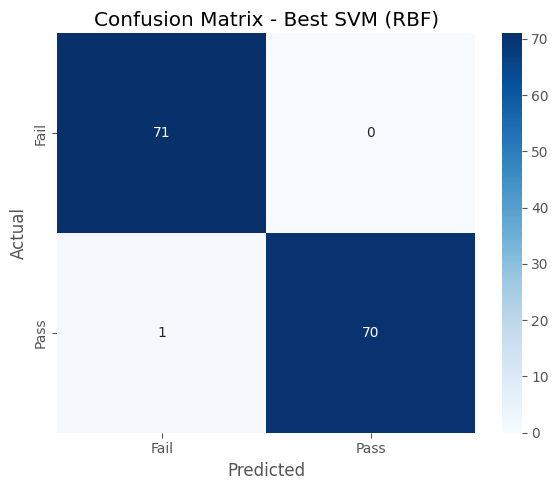

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.title('Confusion Matrix - Best SVM (RBF)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


**7. Analisis keunggulan & keterbatasan SVM**

In [ ]:
print("\nKEUNGGULAN SVM:")
print("- Efektif untuk data berdimensi tinggi")
print("- Kernel trick memungkinkan pemisahan non-linear")
print("- Menggunakan support vectors, efisien di memori")

print("\nKETERBATASAN SVM:")
print("- Butuh tuning parameter (C, gamma, kernel)")
print("- Sensitif terhadap feature scaling")
print("- Kurang cocok untuk dataset yang sangat besar")


KEUNGGULAN SVM:
- Efektif untuk data berdimensi tinggi
- Kernel trick memungkinkan pemisahan non-linear
- Menggunakan support vectors, efisien di memori

KETERBATASAN SVM:
- Butuh tuning parameter (C, gamma, kernel)
- Sensitif terhadap feature scaling
- Kurang cocok untuk dataset yang sangat besar
